In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Description:
Break down the dataset in detail, describing what each column represents:

RowNumber: A unique identifier for each row in the dataset.

CustomerId: Unique customer identification number.

Surname: The last name of the customer (for privacy reasons, consider anonymizing this data if not already done).

CreditScore: The customer's credit score at the time of data collection.

Geography: The customer's country or region, providing insights into location-based trends in churn.

Gender: The customer's gender.

Age: The customer's age, valuable for demographic analysis.

Tenure: The number of years the customer has been with the bank.

Balance: The customer's account balance.

NumOfProducts: The number of products the customer has purchased or subscribed to.

HasCrCard: Indicates whether the customer has a credit card (1) or not (0).

IsActiveMember: Indicates whether the customer is an active member (1) or not (0).

EstimatedSalary: The customer's estimated salary.

Exited: The target variable, indicating whether the customer has churned (1) or not (0).

In [3]:
#checking for null values and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# making function to preprocess data and engineer new features, and split into x and y
def preprocessor(df):
  df  = df.copy()
  # dropping  'row number','customer id','surname' columns as they are useless for predictions
  df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)

  # engineer new features
  df['BalanceSalaryRatio'] = df['Balance']/df['EstimatedSalary']
  df['TenureByAge'] = df['Tenure']/(df['Age'])
  df['AgeCategory'] = df['Age'].apply(lambda x: 'Below 30' if x < 30 else ('30 to 40' if x < 40 else ('40 to 50' if x < 50 else 'Above 50')))
  df['MoneyInAccount?'] = df['Balance'].apply(lambda x: 1 if x > 0 else 0)

  # encoding categorical variables
  df = pd.get_dummies(df,drop_first=True,dtype = int)

  # splitting data into features and target variable
  X = df.drop('Exited',axis=1)
  y = df['Exited']
  return X,y


X,y  = preprocessor(df)


In [5]:
def preprocessor_new(df):
  df  = df.copy()
  # dropping  'row number','customer id','surname' columns as they are useless for predictions
  df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)

  # engineer new features
  df['BalanceSalaryRatio'] = df['Balance']/df['EstimatedSalary']
  df['TenureByAge'] = df['Tenure']/(df['Age'])
  df['AgeCategory'] = df['Age'].apply(lambda x: 'Below 30' if x < 30 else ('30 to 40' if x < 40 else ('40 to 50' if x < 50 else 'Above 50')))
  df['MoneyInAccount?'] = df['Balance'].apply(lambda x: 1 if x > 0 else 0)

  # encoding categorical variables
  df = pd.get_dummies(df,drop_first=True,dtype = int)


  return df

df1 = preprocessor_new(df)

In [6]:
#oversmapling the minority target class(0) for a 50-50 ratio btw 1 and 0

from imblearn.over_sampling import RandomOverSampler


ros = RandomOverSampler(random_state=42,sampling_strategy=1)
X, y = ros.fit_resample(X, y)



In [7]:
#here are the results

y.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [8]:
#Ration= of target variable (may need re-sampling later for more equal distribution )
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [9]:
X.shape

(15926, 17)

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=16)

pca.fit(X_scaled)
pca.explained_variance_ratio_




#X_trans = pca.transform(X)
#X_reduced = pca.inverse_transform(X_trans)
#plt.plot(X_reduced[:,0],X_reduced[:,1],'o')
#plt.show()


array([0.14929605, 0.1333924 , 0.0933157 , 0.07920581, 0.06615211,
       0.0630856 , 0.06110286, 0.05926911, 0.0575759 , 0.0558184 ,
       0.05476834, 0.05168631, 0.03312691, 0.03140339, 0.00505557,
       0.00391382])

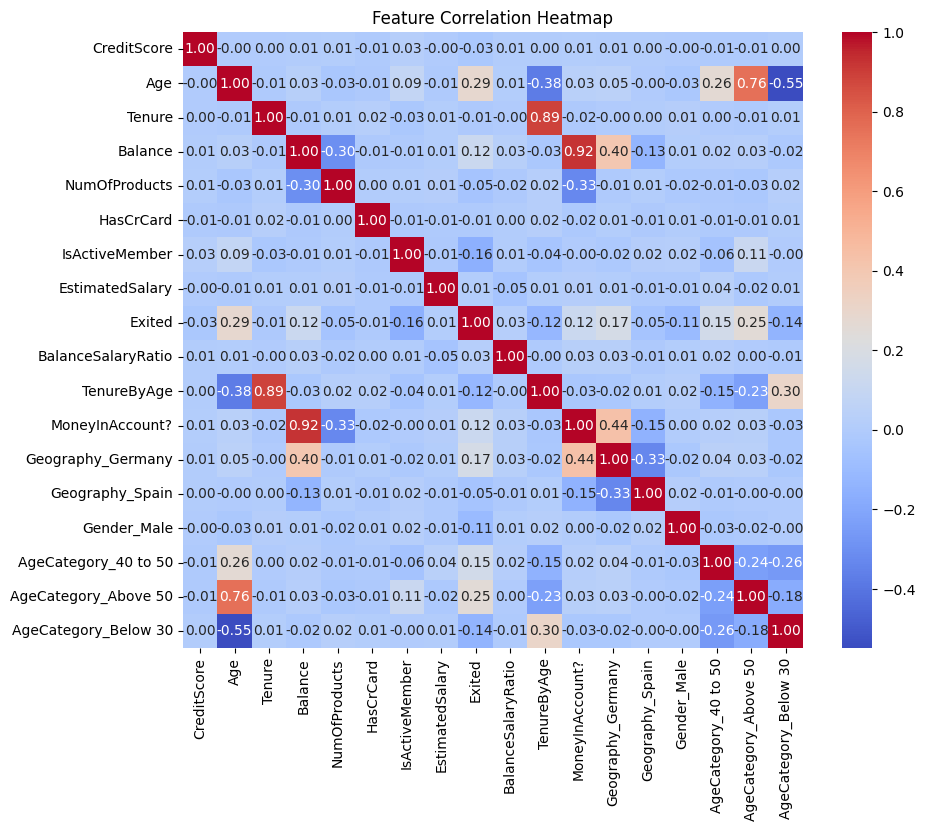

In [11]:
#amalyzing feature correlations with the target varibale and with each other

corr_matrix = df1.corr()

import seaborn as sns


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


In [12]:
#splitting data into training,cross-val,test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.05,random_state=42)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.05,random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
#importing logistic regressor,random forest classifier.xgboost classifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
#importing pipeline
from sklearn.pipeline import make_pipeline

In [14]:
X_train.columns


Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'BalanceSalaryRatio',
       'TenureByAge', 'MoneyInAccount?', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male', 'AgeCategory_40 to 50',
       'AgeCategory_Above 50', 'AgeCategory_Below 30'],
      dtype='object')

In [15]:
col_set = ['CreditScore',  'NumOfProducts', 'HasCrCard',
            'IsActiveMember', 'EstimatedSalary', 'BalanceSalaryRatio',
       'TenureByAge', 'Geography_Germany', 'Geography_Spain', 'Gender_Male',
       'AgeCategory_Below 30', 'AgeCategory_Above 50', 'AgeCategory_40 to 50',
       ]

In [16]:
#testing out logostic regression
log_pipe = make_pipeline(StandardScaler(),LogisticRegression(random_state=42))
log_pipe.fit(X_train,y_train)
y_train_pred = log_pipe.predict(X_train)
y_pred = log_pipe.predict(X_val)
print("Accuracy on train: {:.2f}".format(accuracy_score(y_train, y_train_pred)), end=", ")
print("Accuracy on val: {:.2f}".format(accuracy_score(y_val, y_pred)))

print("Precision on train: {:.2f}".format(precision_score(y_train, y_train_pred)), end=", ")
print("Precision on val: {:.2f}".format(precision_score(y_val, y_pred)))

print("Recall on train: {:.2f}".format(recall_score(y_train, y_train_pred)), end=", ")
print("Recall on val: {:.2f}".format(recall_score(y_val, y_pred)))

print("F1 score on train: {:.2f}".format(f1_score(y_train, y_train_pred)), end=", ")
print("F1 score on val: {:.2f}".format(f1_score(y_val, y_pred)))

Accuracy on train: 0.71, Accuracy on val: 0.72
Precision on train: 0.71, Precision on val: 0.71
Recall on train: 0.70, Recall on val: 0.73
F1 score on train: 0.71, F1 score on val: 0.72


In [17]:
#testing out random firest regressor
rf = make_pipeline(StandardScaler(),RandomForestClassifier(random_state=42))
rf.fit(X_train,y_train)
y_train_pred = rf.predict(X_train)
y_pred = rf.predict(X_val)
print("Accuracy on train: {:.2f}".format(accuracy_score(y_train, y_train_pred)), end=", ")
print("Accuracy on val: {:.2f}".format(accuracy_score(y_val, y_pred)))

print("Precision on train: {:.2f}".format(precision_score(y_train, y_train_pred)), end=", ")
print("Precision on val: {:.2f}".format(precision_score(y_val, y_pred)))

print("Recall on train: {:.2f}".format(recall_score(y_train, y_train_pred)), end=", ")
print("Recall on val: {:.2f}".format(recall_score(y_val, y_pred)))

print("F1 score on train: {:.2f}".format(f1_score(y_train, y_train_pred)), end=", ")
print("F1 score on val: {:.2f}".format(f1_score(y_val, y_pred)))

Accuracy on train: 1.00, Accuracy on val: 0.95
Precision on train: 1.00, Precision on val: 0.92
Recall on train: 1.00, Recall on val: 0.99
F1 score on train: 1.00, F1 score on val: 0.95


In [18]:
#testing out xgboost nodel
xgb = make_pipeline(StandardScaler(),XGBClassifier(random_state=42))
xgb.fit(X_train,y_train)
y_train_pred = xgb.predict(X_train)
y_pred = xgb.predict(X_val)
print("Accuracy on train: {:.2f}".format(accuracy_score(y_train, y_train_pred)), end=", ")
print("Accuracy on val: {:.2f}".format(accuracy_score(y_val, y_pred)))

print("Precision on train: {:.2f}".format(precision_score(y_train, y_train_pred)), end=", ")
print("Precision on val: {:.2f}".format(precision_score(y_val, y_pred)))

print("Recall on train: {:.2f}".format(recall_score(y_train, y_train_pred)), end=", ")
print("Recall on val: {:.2f}".format(recall_score(y_val, y_pred)))

print("F1 score on train: {:.2f}".format(f1_score(y_train, y_train_pred)), end=", ")
print("F1 score on val: {:.2f}".format(f1_score(y_val, y_pred)))

Accuracy on train: 0.96, Accuracy on val: 0.92
Precision on train: 0.95, Precision on val: 0.88
Recall on train: 0.97, Recall on val: 0.96
F1 score on train: 0.96, F1 score on val: 0.92


In [19]:
#final evaluation of rf(best model acc to above results) on test set
y_test_pred = rf.predict(X_test)
print("Accuracy on test: {:.2f}".format(accuracy_score(y_test, y_test_pred)), end=", ")
print("Precision on test: {:.2f}".format(precision_score(y_test, y_test_pred)), end=", ")
print("Recall on test: {:.2f}".format(recall_score(y_test, y_test_pred)), end=", ")
print("F1 score on test: {:.2f}".format(f1_score(y_test, y_test_pred)))

Accuracy on test: 0.96, Precision on test: 0.94, Recall on test: 0.98, F1 score on test: 0.96


In [20]:
import joblib as jb
filename = 'churnclassifier.sav'
# load the model from the file
jb.dump(rf,filename)



['churnclassifier.sav']